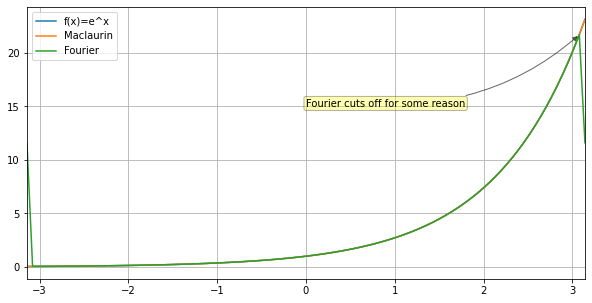

In [1]:
from scipy.special import factorial as fct
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 100)
y1 = np.exp(x)

plt.figure(figsize=(10, 5))
plt.plot(x,y1, label='f(x)=e^x')

y2, y3 = np.array([]), np.array([])

def maclaurin(x):
    e = 0
    eps = 0.00001
    s = 1
    i = 1
    while np.abs(s) > eps:
        e += s
        s = (x**i)/fct(i)
        i += 1
    return e

def fourier(x, print_steps=False, num_steps=10000):
    e = 0
    a0 = (np.exp(np.pi) - np.exp(-np.pi)) / (2*np.pi)
    i = 1
    while i < num_steps:  
        e += a0
        an = np.exp(np.pi) - np.exp(-np.pi)
        bn = np.exp(-np.pi) - np.exp(np.pi)
        a0 = (-1)**i/((i**2 + 1) * np.pi) * (an*np.cos(i*x) + bn*i*np.sin(i*x))
        i += 1
    if print_steps:
        print(f'Number of elements in sum: {i}')
    return e

val = 0
for n in range(len(x)):
    val = maclaurin(x[n])
    y2 = np.append(y2, val)

val = 0
for n in range(len(x)):
    val = fourier(x[n])
    y3 = np.append(y3, val)

plt.plot(x,y2, label='Maclaurin')
plt.plot(x,y3, label='Fourier')

plt.annotate('Fourier cuts off for some reason', xy=(x[-2], y3[-2]), bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
             xytext=(0., 15.), arrowprops = dict(facecolor ='green', alpha=0.6, arrowstyle="-|>", connectionstyle="arc3,rad=0.2"))
plt.grid()
plt.xlim([-np.pi, np.pi])
plt.legend()
plt.show()